# Part 1 – discoveries

This is the beginning of my work, at this step I knew little about EEG. I started to read articles you send in task description and this is what I found:

Most of the useful information about the functional state of a human brain lies in five major brain waves distinguished by their different frequency bands. These frequency bands are delta band (0–4 Hz), theta band (3.5–7.5 Hz), alpha band (7.5–13 Hz), beta band (13–26 Hz), and gamma band (26–70 Hz)
 There are five main categories of candidate evaluation strategies, namely, filtering, wrapping, embedded, hybrid, and human-based techniques. These techniques are used for subset evaluation.



In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from scipy.fft import fftshift, fft
from seaborn import heatmap
import seaborn as sns
import mne

import thinkdsp

I plotted it to find redundant channels. I consider on of the well-correlated channel as redundant, because it does not give any new info.

In [89]:
freq = 1000 #Hz
df = pd.read_csv('first.csv', header=None)
df = df.T
df.head()

0             1         2         3         4         5   \
0 -0.000007  1.361943e-05 -0.000004 -0.000002 -0.000006 -0.000010   
1 -0.000002  6.889464e-06 -0.000006 -0.000005 -0.000008 -0.000010   
2  0.000003  9.700098e-08 -0.000008 -0.000009 -0.000010 -0.000010   
3  0.000008 -6.693844e-06 -0.000009 -0.000011 -0.000011 -0.000009   
4  0.000013 -1.323892e-05 -0.000010 -0.000012 -0.000012 -0.000008   

             6         7             8         9   ...        22        23  \
0 -7.595006e-07 -0.000001 -1.664115e-06 -0.000001  ...  0.000009  0.000007   
1 -2.828937e-06 -0.000002 -1.277049e-06 -0.000003  ...  0.000008  0.000006   
2 -4.739417e-06 -0.000002 -8.981117e-07 -0.000004  ...  0.000008  0.000006   
3 -6.339069e-06 -0.000002 -5.735459e-07 -0.000005  ...  0.000007  0.000005   
4 -7.496405e-06 -0.000002 -3.975981e-07 -0.000006  ...  0.000007  0.000004   

             24        25        26        27        28        29        30  \
0  8.767896e-07  0.000004  0.000009  0.000012  0.000013  0.000007  0.000013   
1  2.154500e-06  0.000004  0.000009  0.000011  0.000011  0.000009  0.000014   
2  3.621418e-06  0.000005  0.000009  0.000011  0.000009  0.000011  0.000014   
3  5.261176e-06  0.000006  0.000010  0.000010  0.000008  0.000013  0.000015   
4  6.758102e-06  0.000007  0.000011  0.000011  0.000007  0.000016  0.000017   

         31  
0  0.000017  
1  0.000015  
2  0.000013  
3  0.000012  
4  0.000012  

[5 rows x 32 columns]

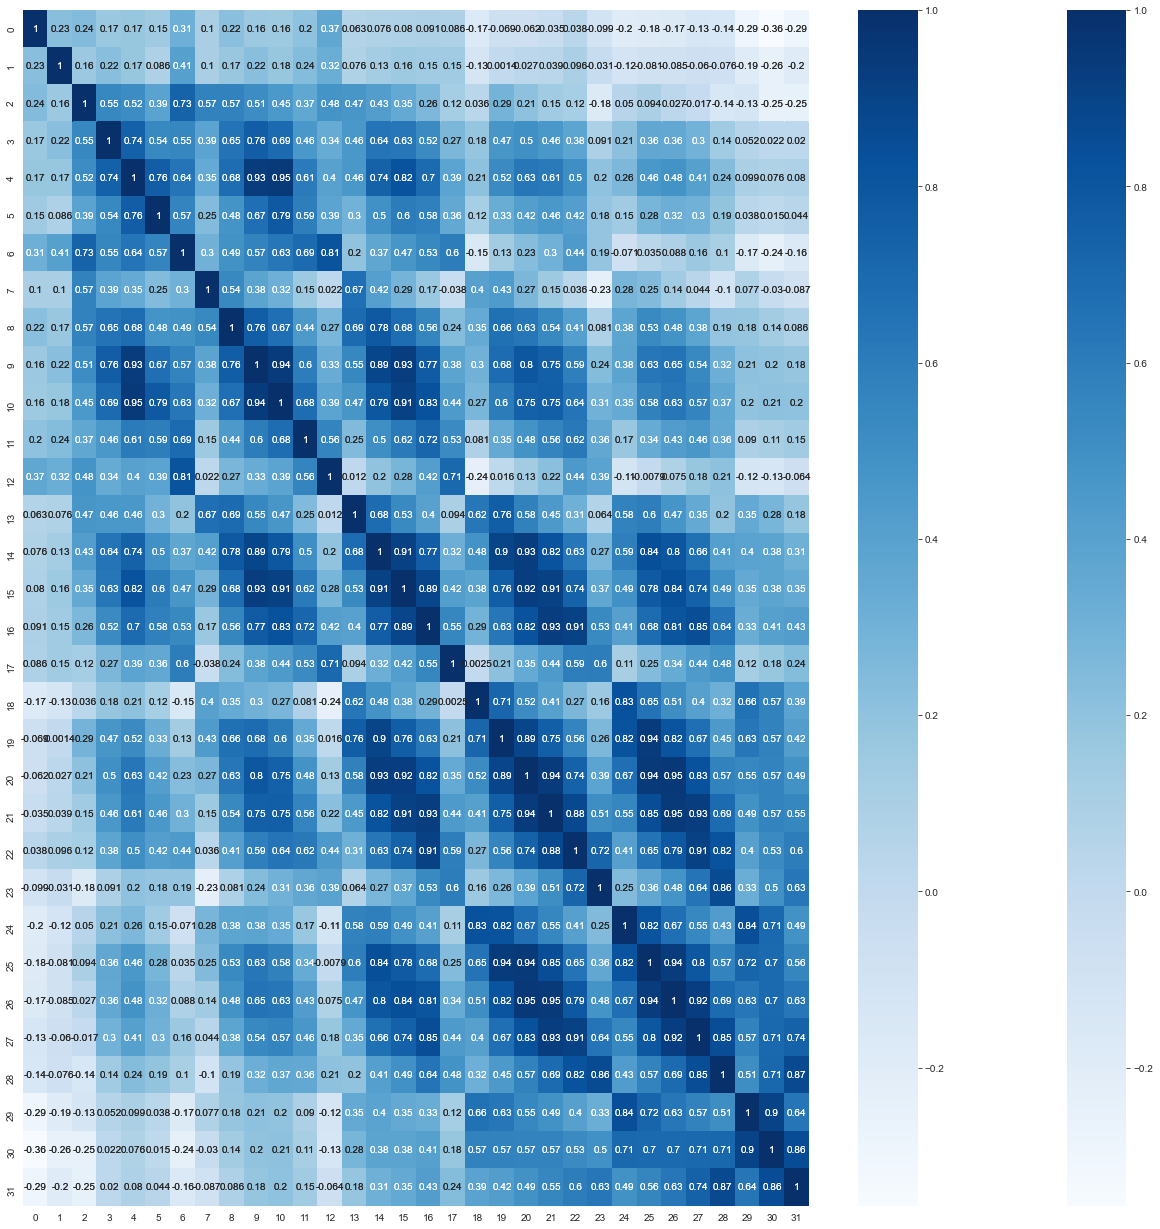

In [90]:
fig, ax = plt.subplots(figsize=(22, 22))
corr = df.corr()
heatmap(corr, cmap="Blues", annot=True)
ax = sns.heatmap(corr, cmap="Blues", annot=True)

I see that some channels have correlation more than 0.9, so I will drop them to reduce searching. If I don't, there are 32 channels which can be filtered by 5 frequency bands -> 160 graphs to analyse.

In [128]:
# print(corr[0][1])
# drop one of two channels which have corr > 0.9
channels_to_drop = [] # indices of channels to drop
for i in range(corr.shape[0]):
    for j in range(corr.shape[1]):
        if i<j and corr[i][j]>=0.9 and (j not in channels_to_drop):
            channels_to_drop.append(j)
channels_to_drop = set(channels_to_drop)
channels_to_drop
# print(channels_to_drop)
# df = df.drop(columns=channels_to_drop)
# fig, ax = plt.subplots(figsize=(22, 22))
# corr = df.corr()
# heatmap(corr, cmap="Blues", annot=True)
# ax = sns.heatmap(corr, cmap="Blues", annot=True)

{9, 10, 15, 20, 21, 22, 25, 26, 27, 30}

But after some time I decided not to drop them, but just list them (as you see above).
Then I tried to explore some activities just by looking at the graphs – stupid idea.

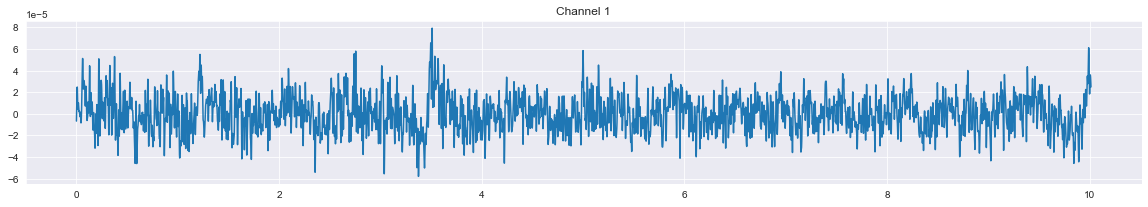

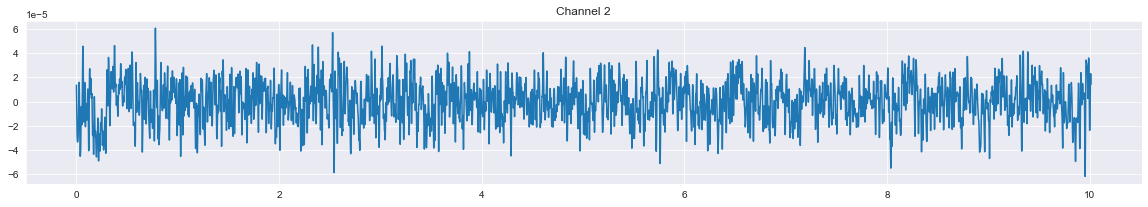

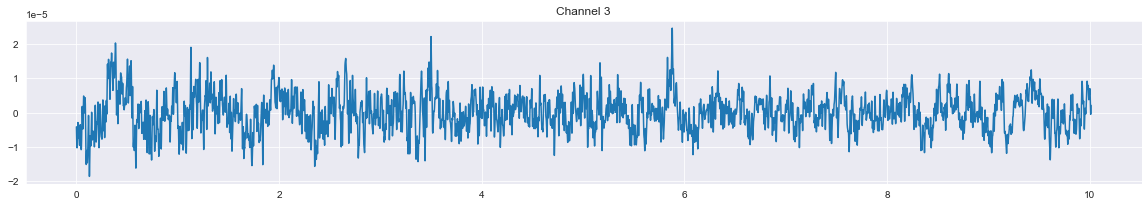

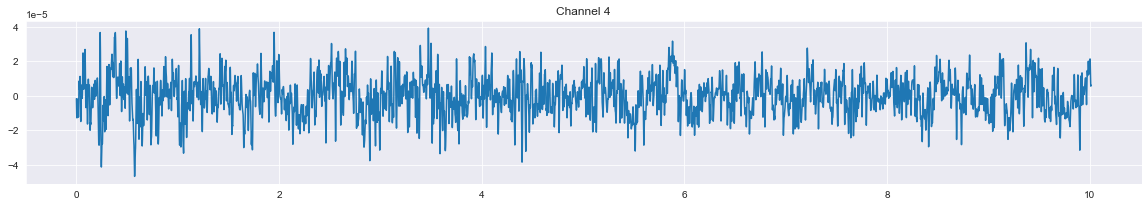

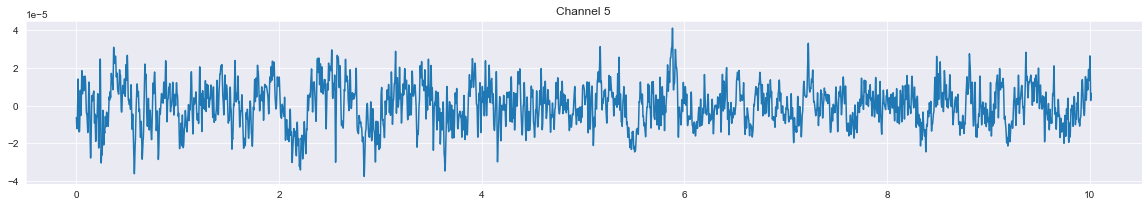

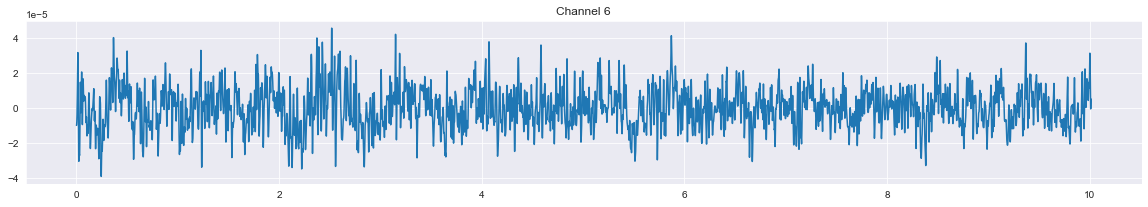

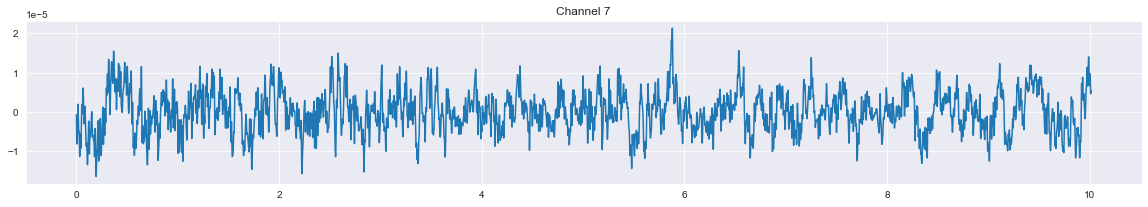

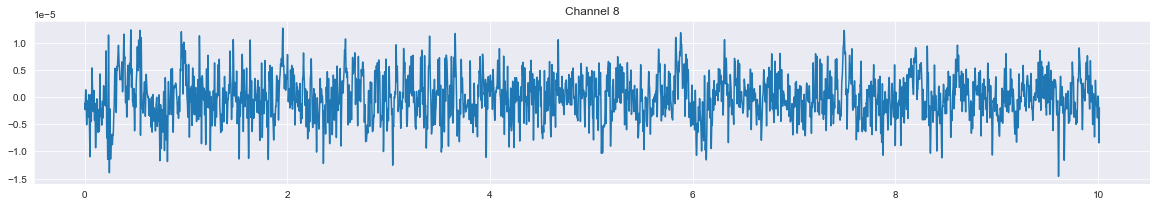

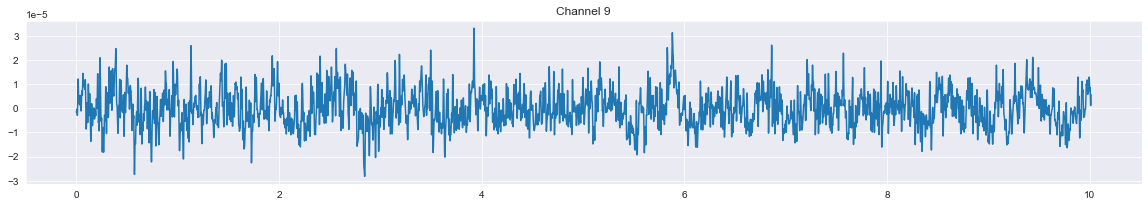

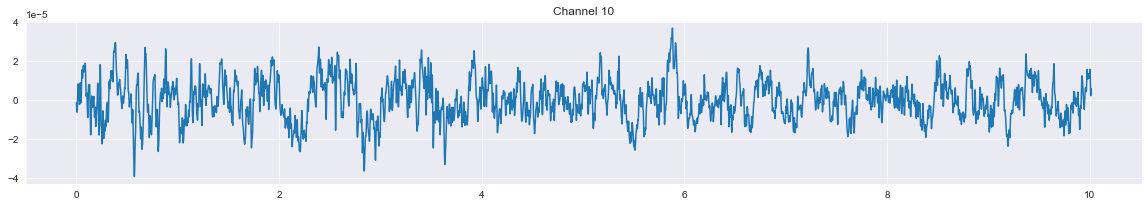

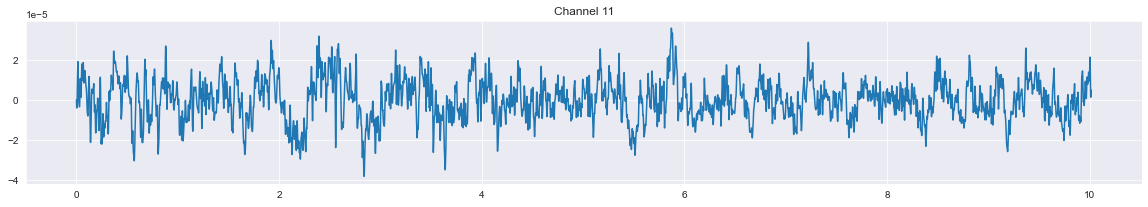

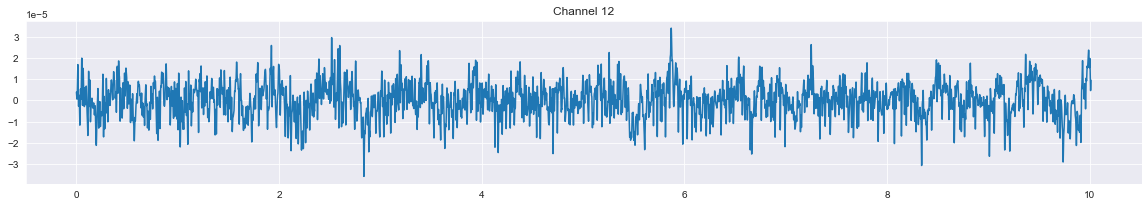

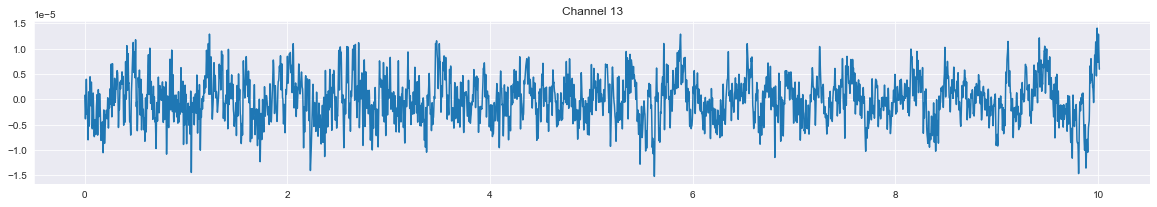

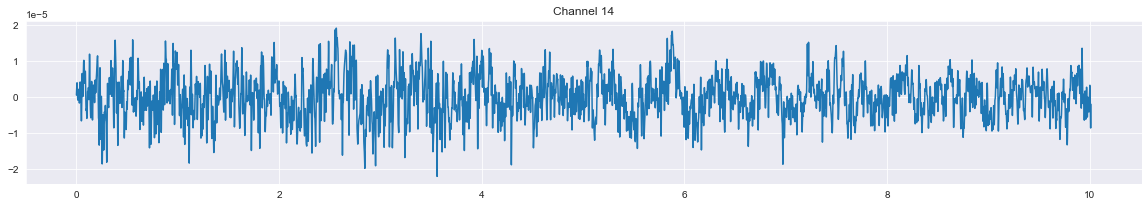

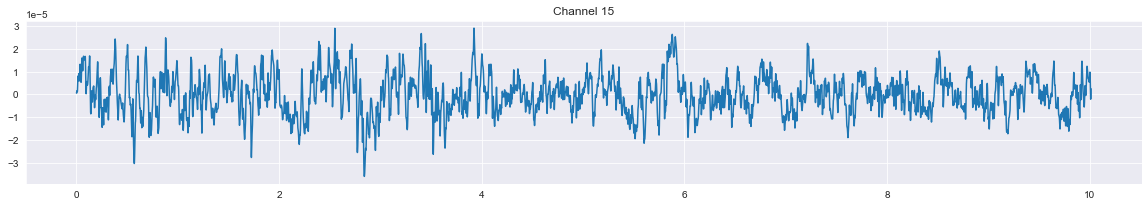

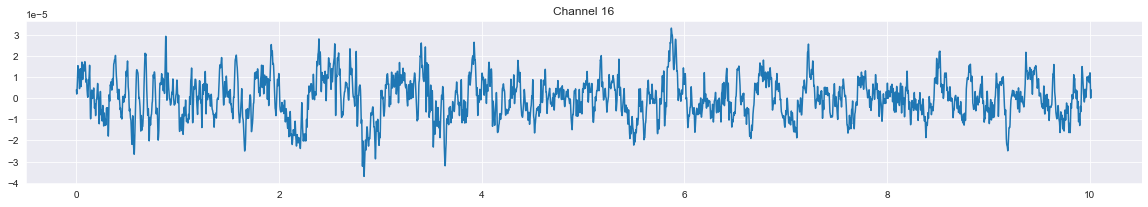

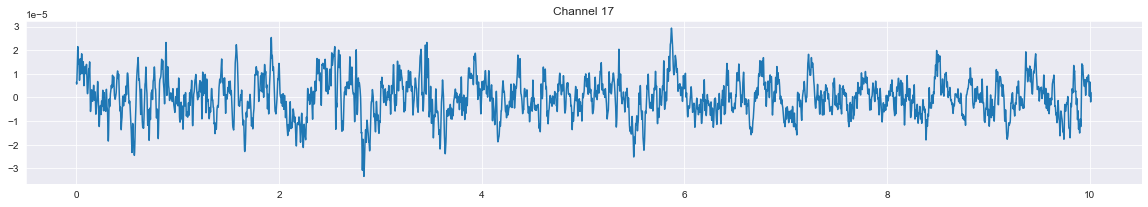

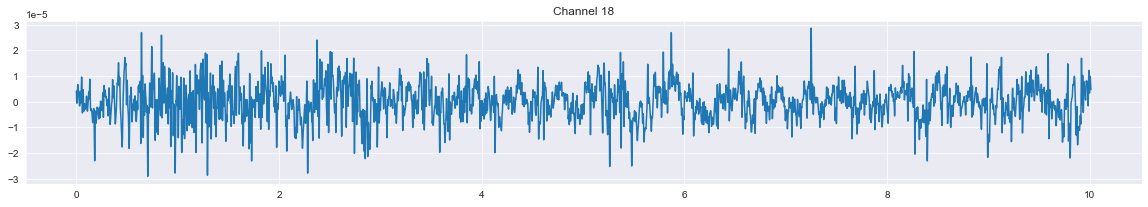

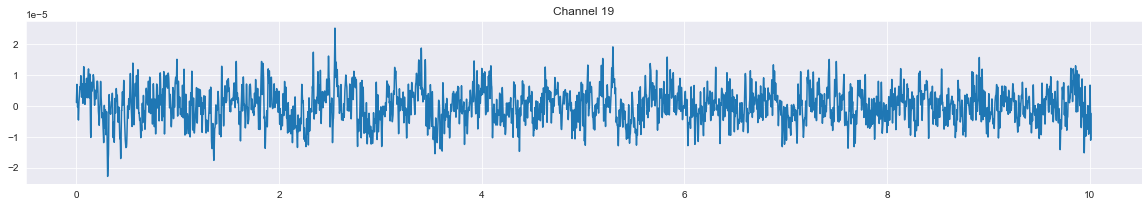

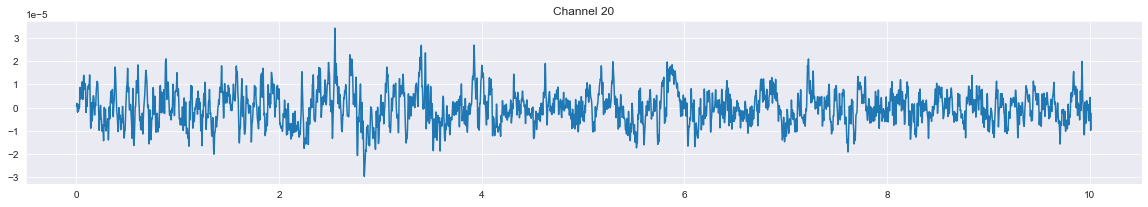

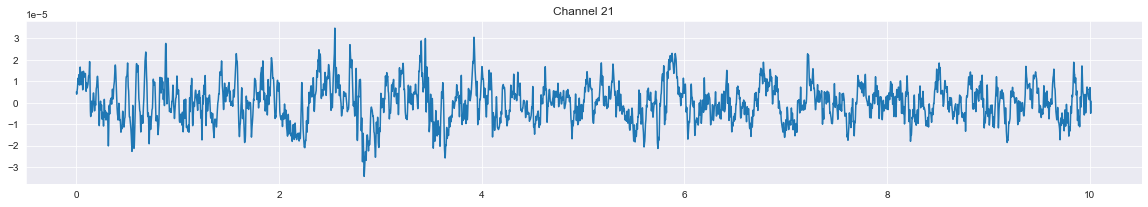

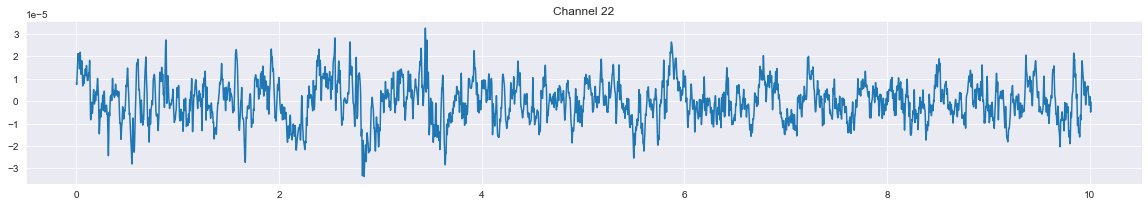

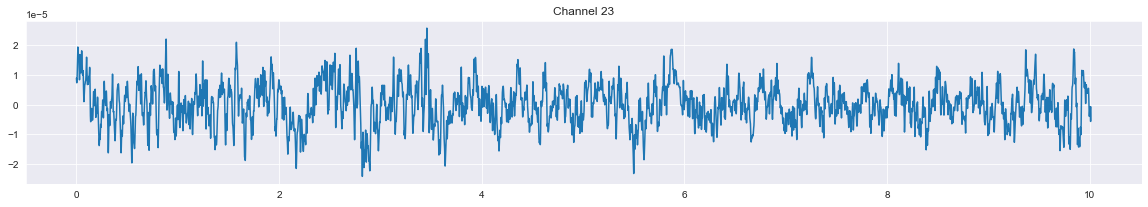

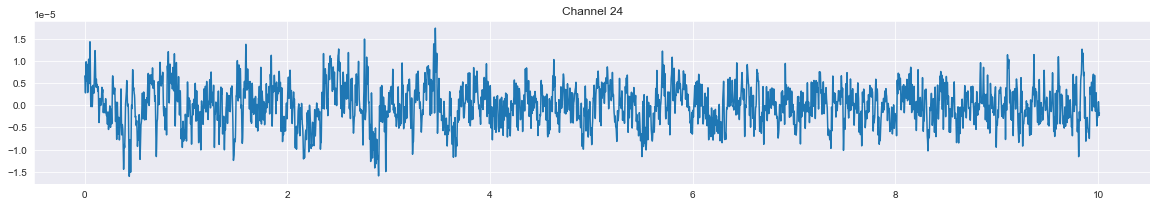

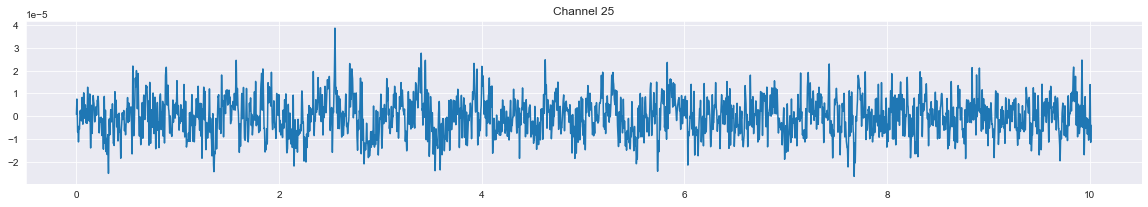

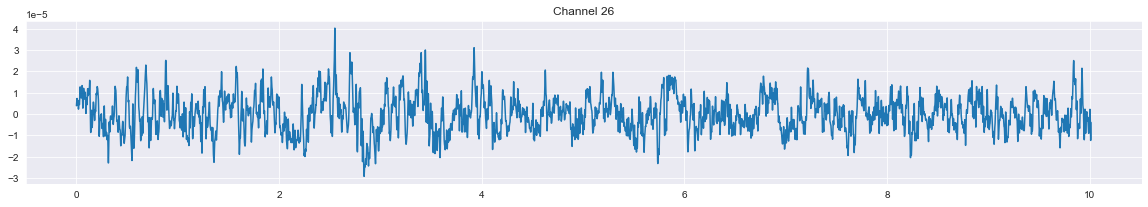

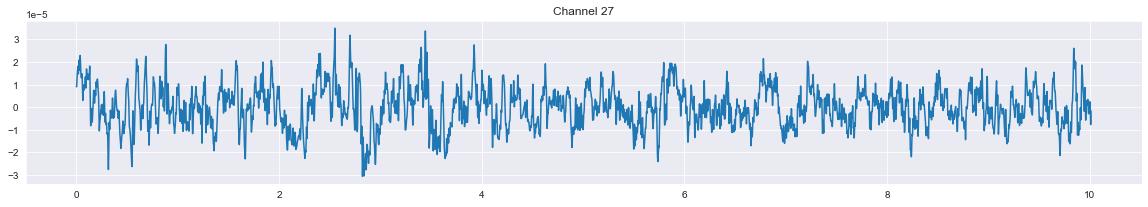

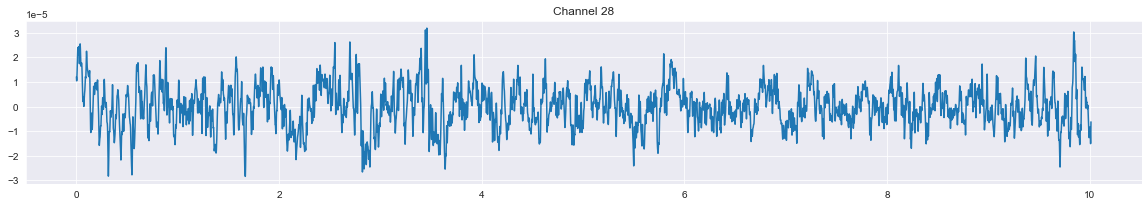

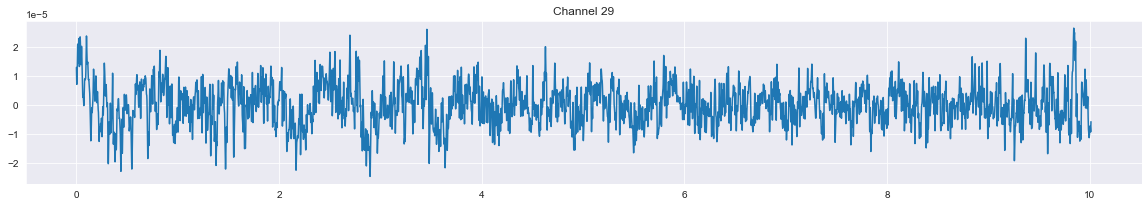

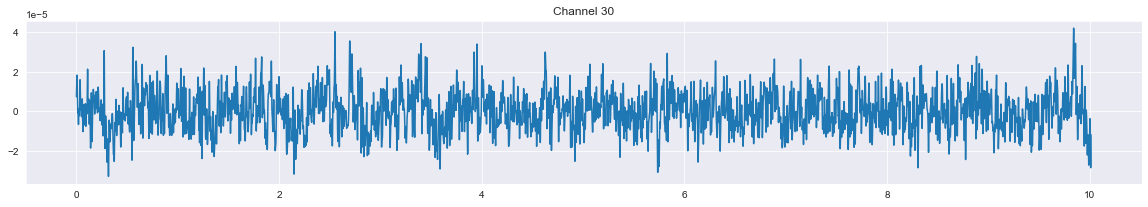

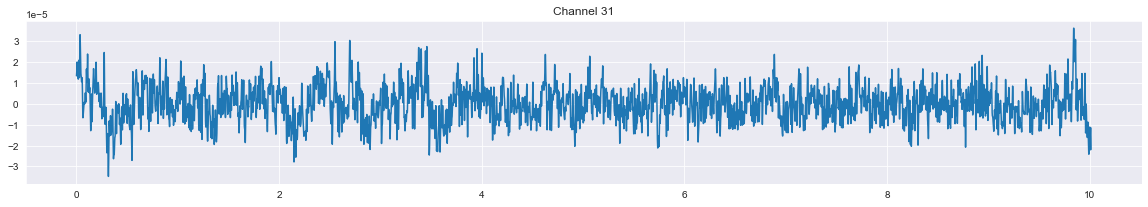

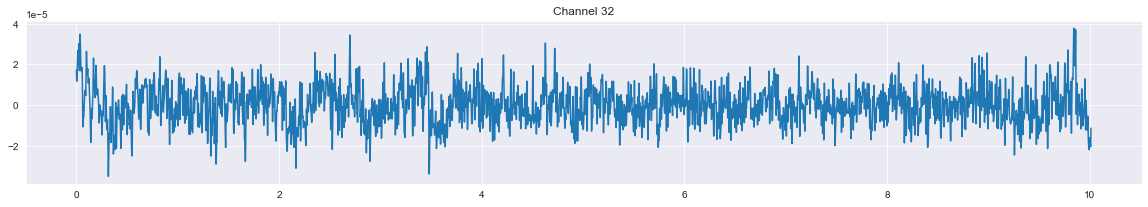

In [92]:
ts = np.linspace(0,df.shape[0]/freq, df.shape[0])

for i in df.columns:
    plt.title(f"Channel {i+1}")
    plt.rcParams["figure.figsize"] = (20,3)
    plt.plot(ts, df[i])
    plt.show()

Then I tried to narrow down my research

Applying Fourier Transform to the channels:
and trying to subtract different frequency bands

/Users/damirnurtdinov/opt/anaconda3/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1289: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


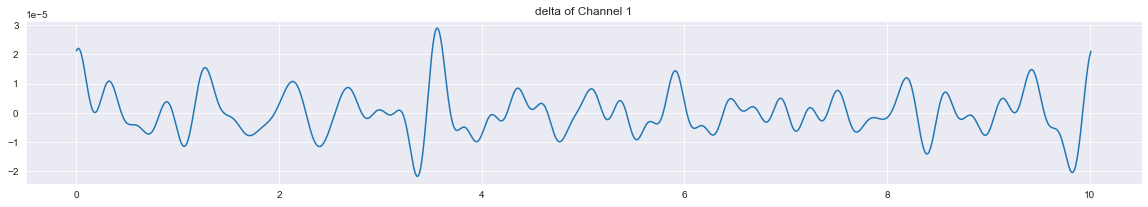

/Users/damirnurtdinov/opt/anaconda3/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1289: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


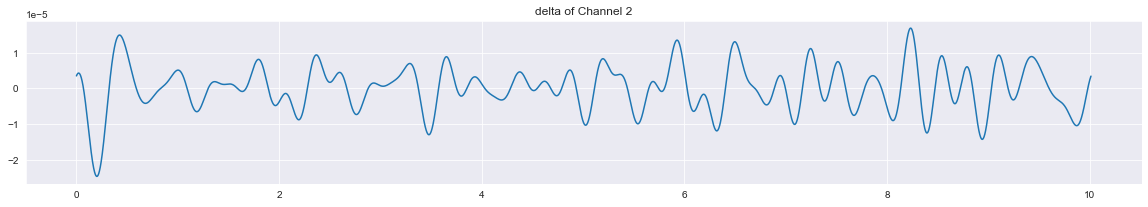

/Users/damirnurtdinov/opt/anaconda3/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1289: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


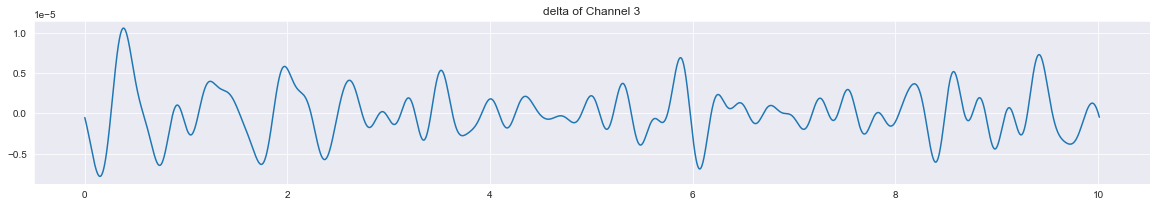

/Users/damirnurtdinov/opt/anaconda3/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1289: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


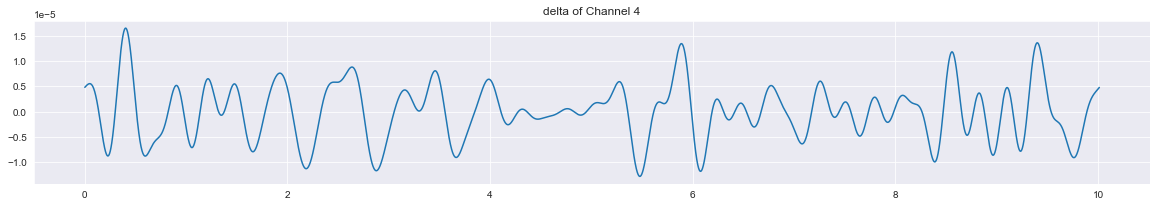

/Users/damirnurtdinov/opt/anaconda3/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1289: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


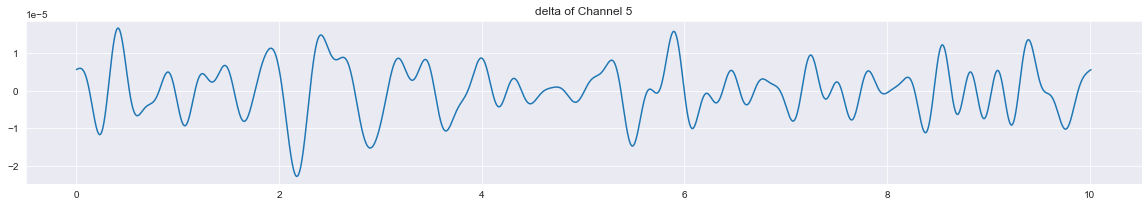

/Users/damirnurtdinov/opt/anaconda3/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1289: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


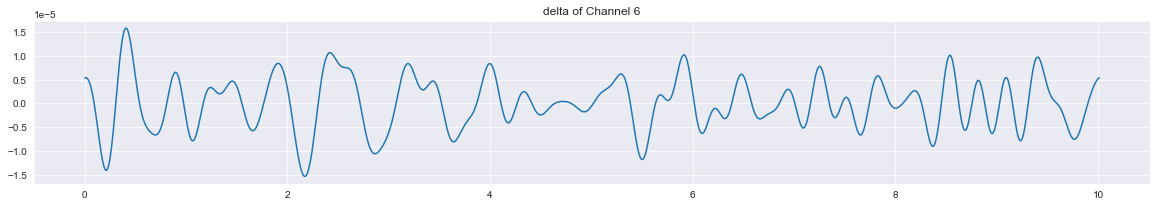

/Users/damirnurtdinov/opt/anaconda3/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1289: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


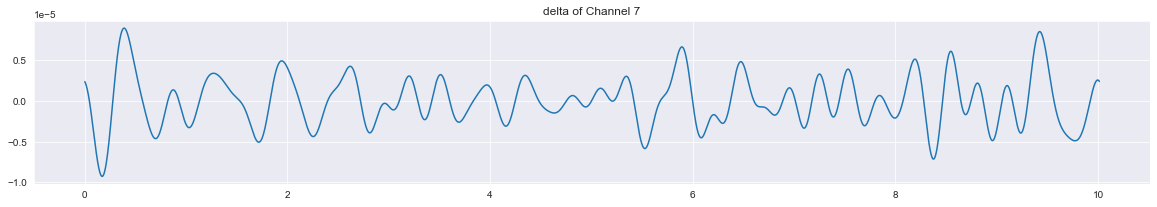

/Users/damirnurtdinov/opt/anaconda3/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1289: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


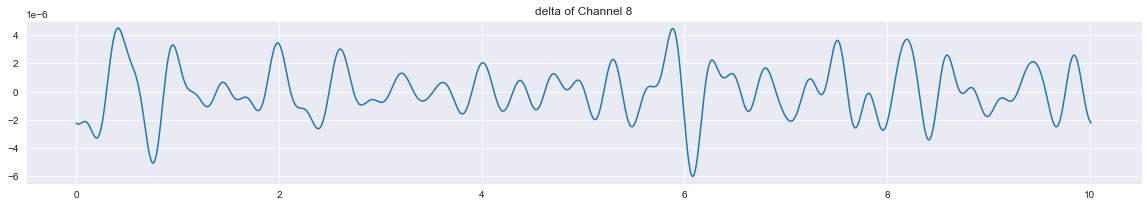

/Users/damirnurtdinov/opt/anaconda3/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1289: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


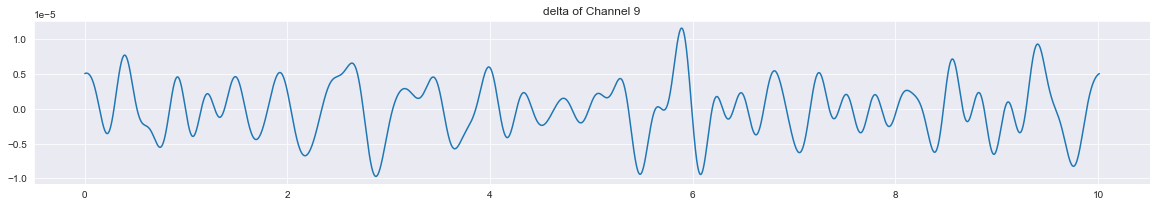

/Users/damirnurtdinov/opt/anaconda3/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1289: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


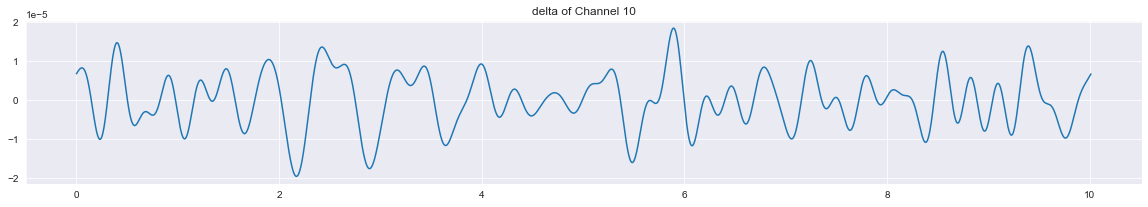

/Users/damirnurtdinov/opt/anaconda3/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1289: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


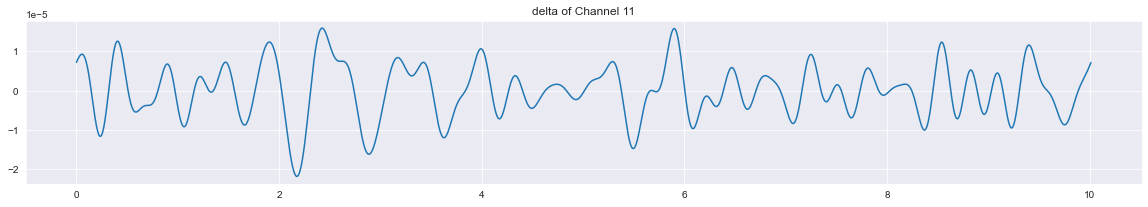

/Users/damirnurtdinov/opt/anaconda3/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1289: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


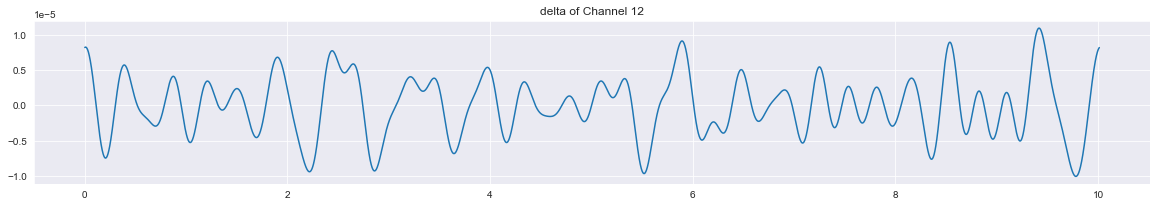

/Users/damirnurtdinov/opt/anaconda3/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1289: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


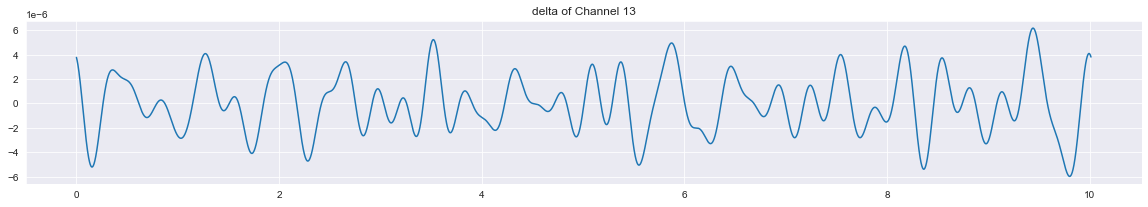

/Users/damirnurtdinov/opt/anaconda3/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1289: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


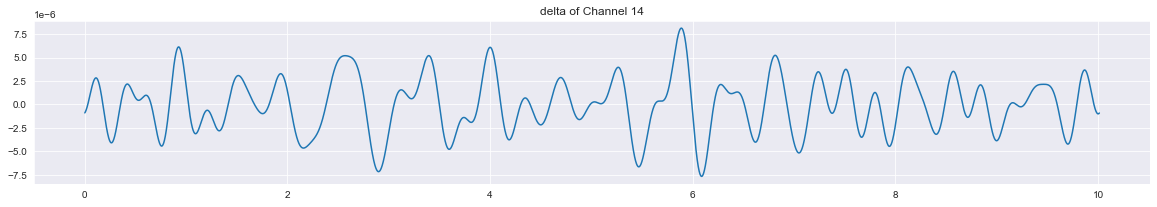

/Users/damirnurtdinov/opt/anaconda3/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1289: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


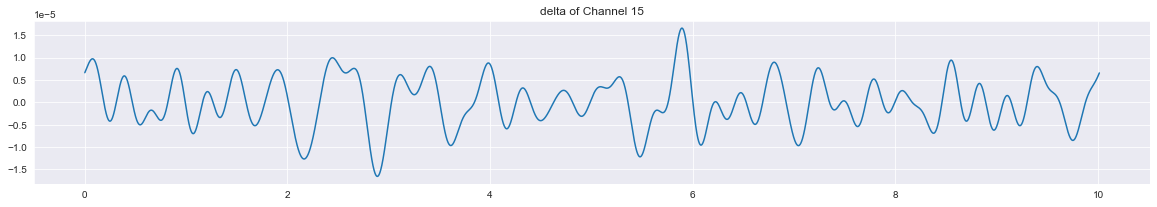

/Users/damirnurtdinov/opt/anaconda3/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1289: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


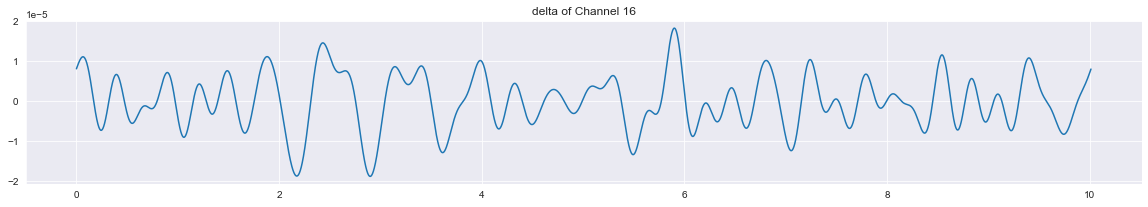

/Users/damirnurtdinov/opt/anaconda3/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1289: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


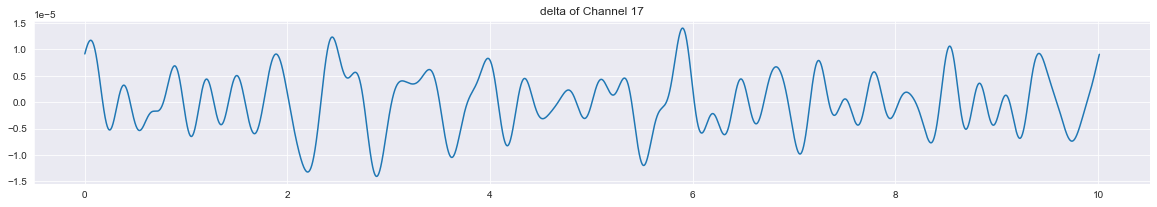

/Users/damirnurtdinov/opt/anaconda3/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1289: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


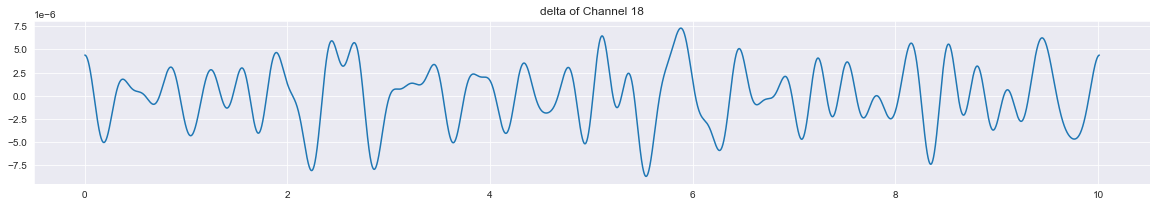

/Users/damirnurtdinov/opt/anaconda3/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1289: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


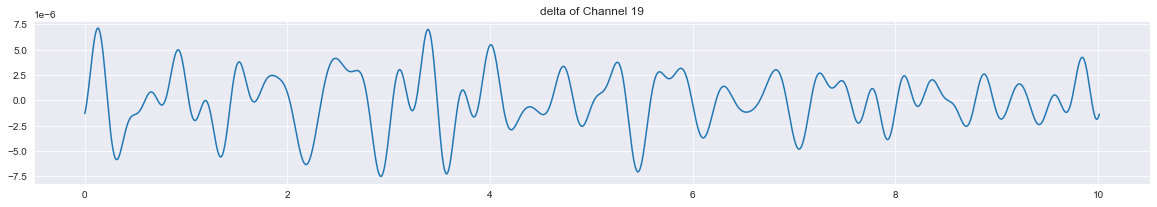

/Users/damirnurtdinov/opt/anaconda3/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1289: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


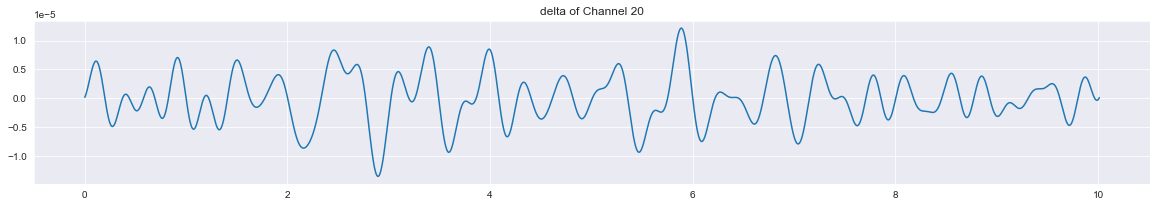

/Users/damirnurtdinov/opt/anaconda3/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1289: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


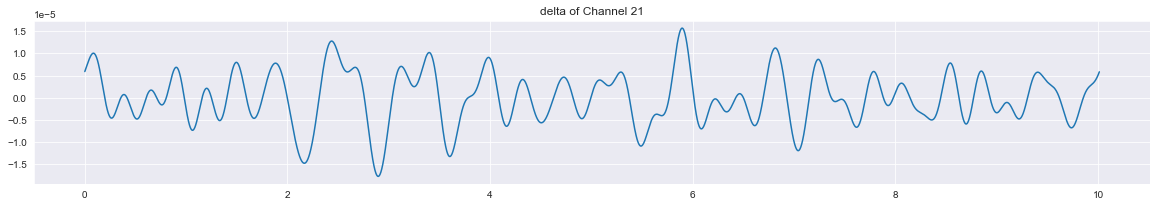

/Users/damirnurtdinov/opt/anaconda3/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1289: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


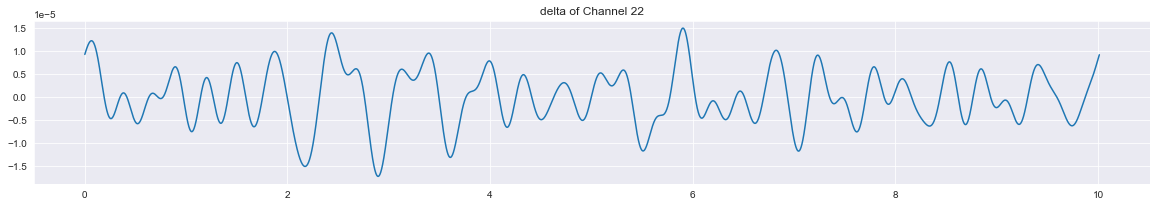

/Users/damirnurtdinov/opt/anaconda3/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1289: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


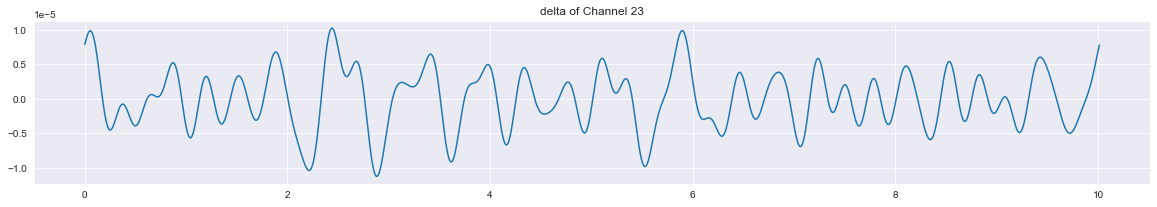

/Users/damirnurtdinov/opt/anaconda3/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1289: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


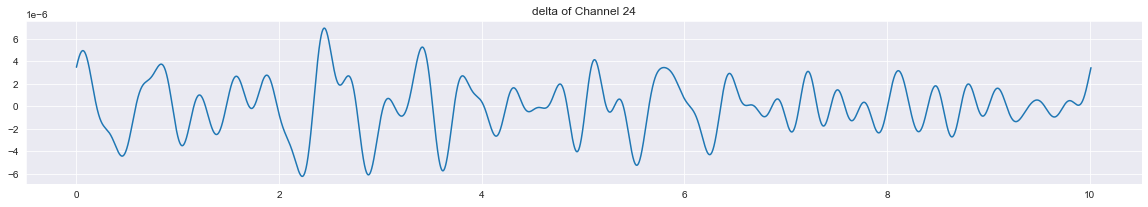

/Users/damirnurtdinov/opt/anaconda3/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1289: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


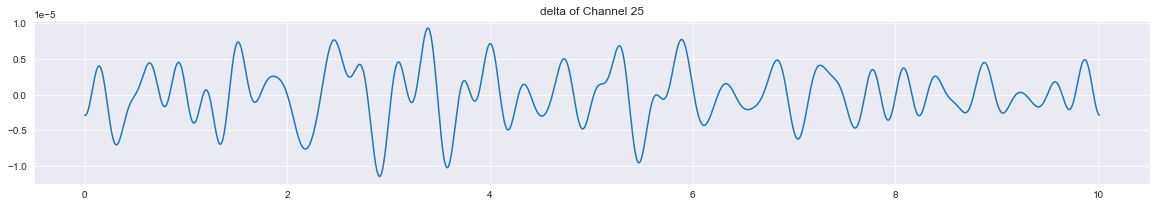

/Users/damirnurtdinov/opt/anaconda3/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1289: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


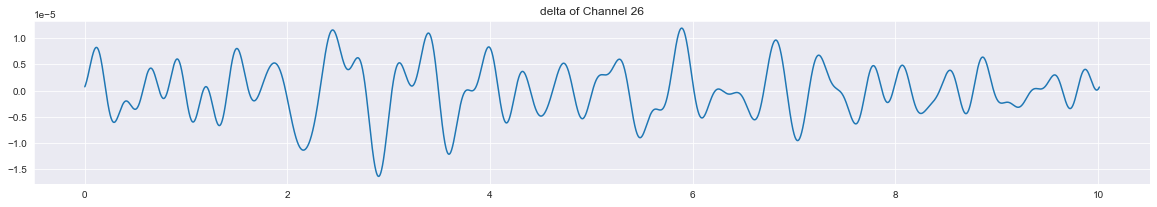

/Users/damirnurtdinov/opt/anaconda3/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1289: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


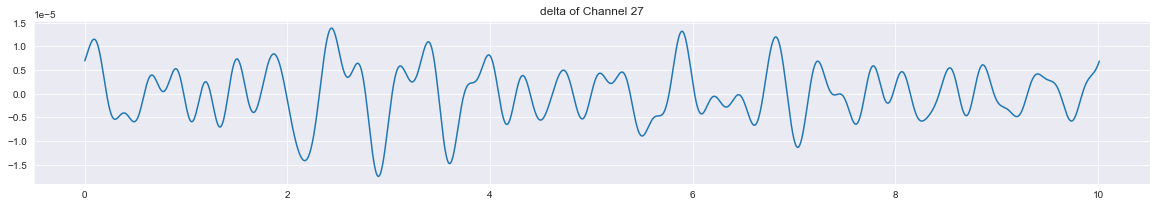

/Users/damirnurtdinov/opt/anaconda3/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1289: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


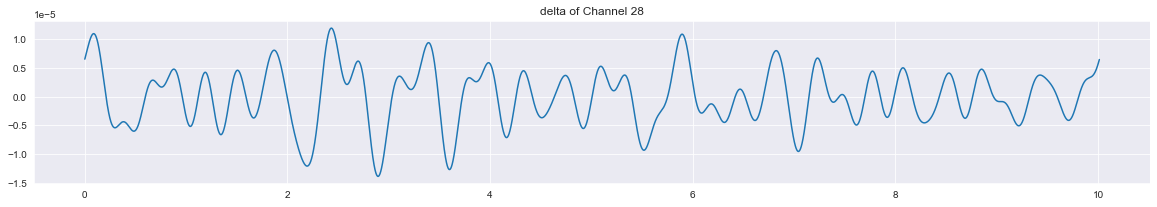

/Users/damirnurtdinov/opt/anaconda3/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1289: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


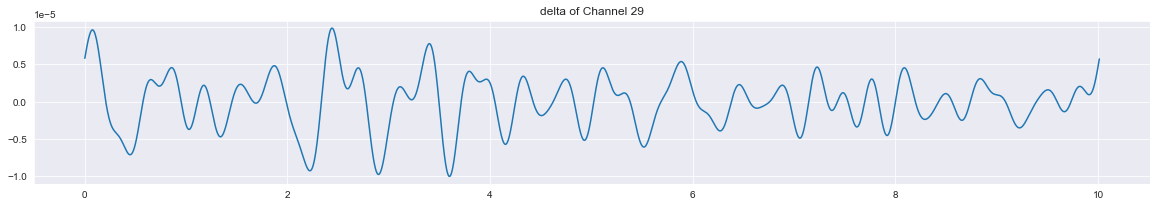

/Users/damirnurtdinov/opt/anaconda3/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1289: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


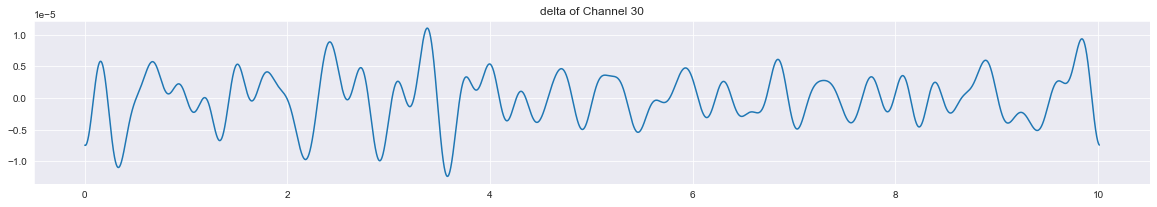

/Users/damirnurtdinov/opt/anaconda3/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1289: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


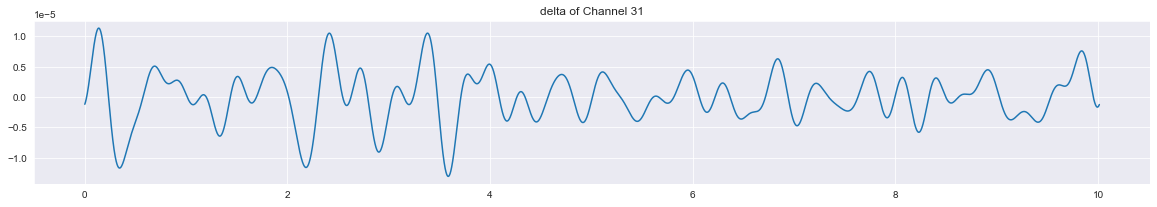

/Users/damirnurtdinov/opt/anaconda3/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1289: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


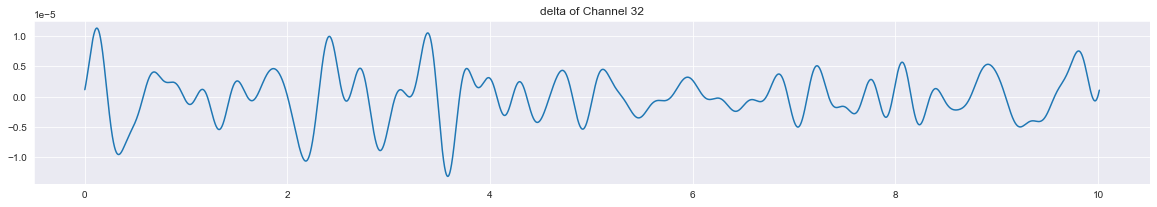

In [94]:
from numpy.fft import fft, ifft, fftfreq
def freq_to_index(frew, l, rate):
    return int(frew*l/rate)

N = df.shape[0]

working_df = df.copy()
# print(working_df)
for i in df.columns:
    fft_signal = fft(np.array(working_df[i]))
    f_index_left = freq_to_index(4, N, freq)
    f_index_right = freq_to_index(500, N, freq)
    for j in range(f_index_left, f_index_right+1):
        fft_signal[j] = complex(0,0)
        fft_signal[-j] = complex(0,0)
    working_df[i] = ifft(fft_signal)
    plt.title(f"delta of Channel {i+1}")
    plt.rcParams["figure.figsize"] = (20,3)
    plt.plot(ts, working_df[i])
    plt.show()

# Part 2 – some good ideas

After reading more about MNE, I tried to create the topomap, but to do this I need layout/montage type for electrodes. This information was given in the description. I found most similar to 10-10 electrodes 32 channel EEG.

In [95]:
mne.channels.get_builtin_montages()

['standard_1005',
 'standard_1020',
 'standard_alphabetic',
 'standard_postfixed',
 'standard_prefixed',
 'standard_primed',
 'biosemi16',
 'biosemi32',
 'biosemi64',
 'biosemi128',
 'biosemi160',
 'biosemi256',
 'easycap-M1',
 'easycap-M10',
 'EGI_256',
 'GSN-HydroCel-32',
 'GSN-HydroCel-64_1.0',
 'GSN-HydroCel-65_1.0',
 'GSN-HydroCel-128',
 'GSN-HydroCel-129',
 'GSN-HydroCel-256',
 'GSN-HydroCel-257',
 'mgh60',
 'mgh70',
 'artinis-octamon',
 'artinis-brite23',
 'brainproducts-RNP-BA-128']

In [96]:
df = pd.read_csv('first.csv', header=None)
montage = mne.channels.make_standard_montage('biosemi32')
ch_names = montage.ch_names
info = mne.create_info(ch_names = ch_names, sfreq = freq, ch_types='eeg')
raw = mne.io.RawArray(df, info)
raw.del_proj()
raw.set_montage(montage)

Creating RawArray with float64 data, n_channels=32, n_times=10012
    Range : 0 ... 10011 =      0.000 ...    10.011 secs
Ready.


<RawArray | 32 x 10012 (10.0 s), ~2.5 MB, data loaded>

Effective window size : 0.256 (s)


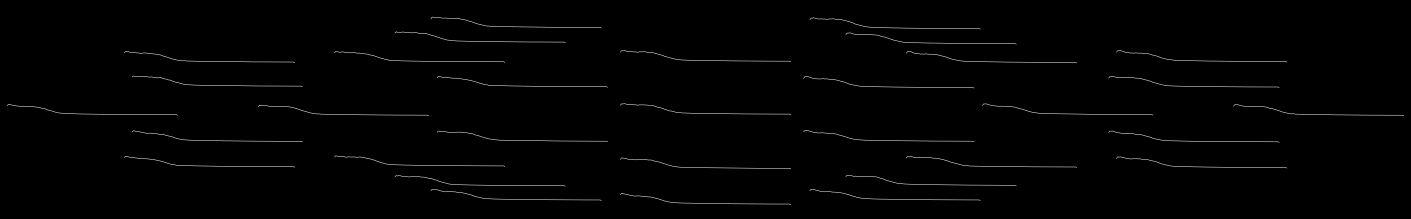

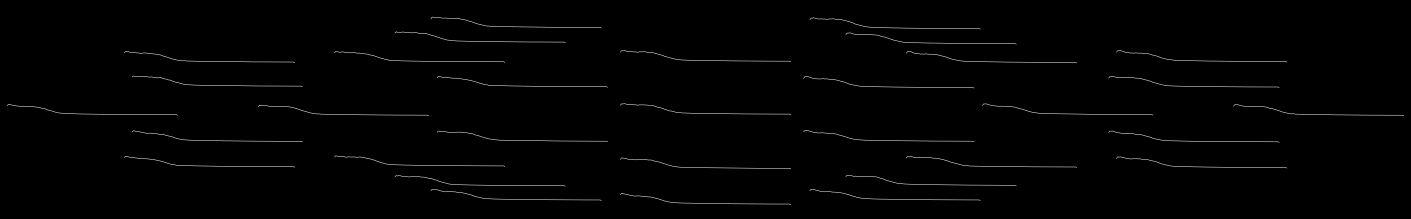

In [97]:
spectrum = raw.compute_psd(picks=ch_names)
spectrum.pick('eeg').plot_topo()

NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 2.048 (s)


/Users/damirnurtdinov/opt/anaconda3/lib/python3.8/site-packages/mne/viz/utils.py:137: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


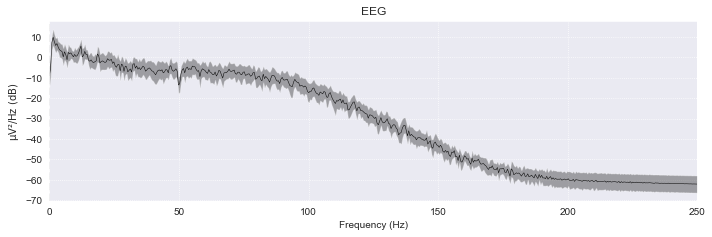

In [98]:
fig = raw.plot_psd(tmax=np.inf, fmax=250, average=True, picks=ch_names)
# add some arrows at 60 Hz and its harmonics:
for ax in fig.axes[1:]:
    freqs = ax.lines[-1].get_xdata()
    psds = ax.lines[-1].get_ydata()
    for freq in (60, 120, 180, 240):
        idx = np.searchsorted(freqs, freq)
        ax.arrow(x=freqs[idx], y=psds[idx] + 18, dx=0, dy=-12, color='red',
                 width=0.1, head_width=3, length_includes_head=True)

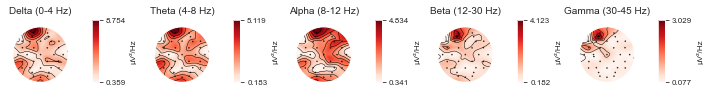

In [99]:
fig = spectrum.pick('eeg').plot_topomap()

From these scalp topography I see some activity at the top part of the head – Frontal Lobe. So, I started to search  which activities frontal lobe is responsible for: voluntary movement, expressive language and for managing higher level executive functions. I found an article (https://www.researchgate.net/publication/23786225_Emotional_Face_Processing_and_Emotion_Regulation_in_Children_An_ERP_Study) about emotions expression of children, and there I found EEG pattern which is similar to data above of delta of 25-30 channels for 5.5-6 sec. In the article they state that this signal was obtained from fear emotion. But this theory may be incorrect, lets see.

I also noticed that the activity in the brain concentrated on the area where electrode Fp1 is located.


In [100]:
ch_names

['Fp1',
 'AF3',
 'F7',
 'F3',
 'FC1',
 'FC5',
 'T7',
 'C3',
 'CP1',
 'CP5',
 'P7',
 'P3',
 'Pz',
 'PO3',
 'O1',
 'Oz',
 'O2',
 'PO4',
 'P4',
 'P8',
 'CP6',
 'CP2',
 'C4',
 'T8',
 'FC6',
 'FC2',
 'F4',
 'F8',
 'AF4',
 'Fp2',
 'Fz',
 'Cz']

From the list above I see that Fp1 electrode matches with the first channel.

# Part 3 – really good ideas
But let's see changes over the time

Effective window size : 0.256 (s)


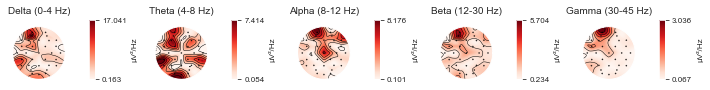

time 0.5269473684210526
Effective window size : 0.256 (s)


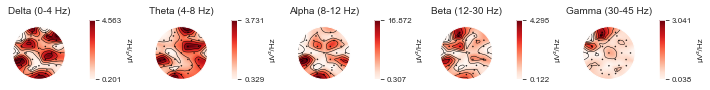

time 1.0538947368421052
Effective window size : 0.256 (s)


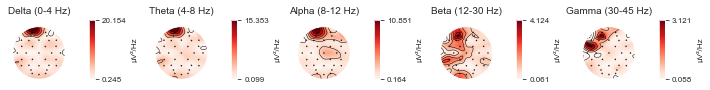

time 1.5808421052631578
Effective window size : 0.256 (s)


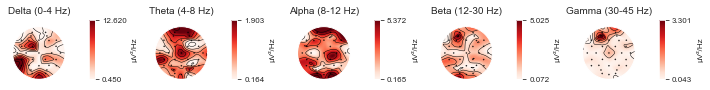

time 2.1077894736842104
Effective window size : 0.256 (s)


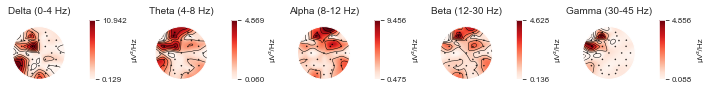

time 2.634736842105263
Effective window size : 0.256 (s)


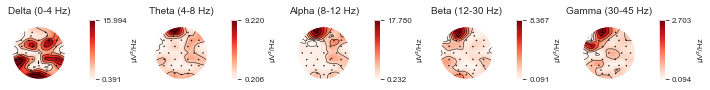

time 3.1616842105263157
Effective window size : 0.256 (s)


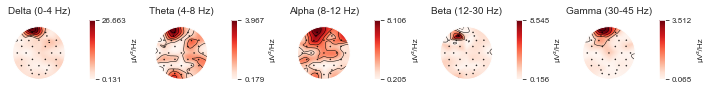

time 3.6886315789473683
Effective window size : 0.256 (s)


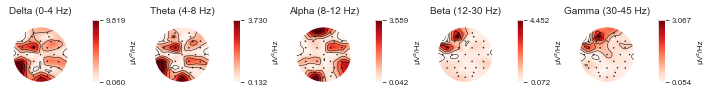

time 4.215578947368421
Effective window size : 0.256 (s)


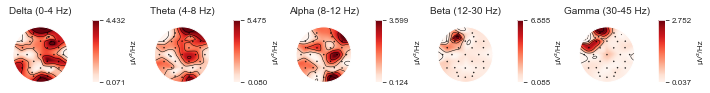

time 4.7425263157894735
Effective window size : 0.256 (s)


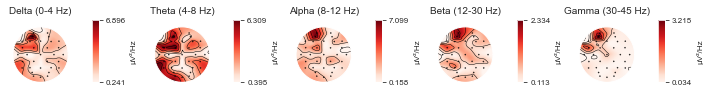

time 5.269473684210526
Effective window size : 0.256 (s)


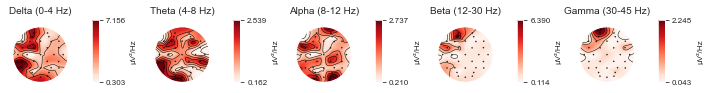

time 5.796421052631579
Effective window size : 0.256 (s)


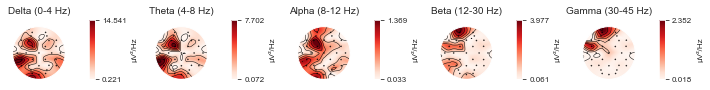

time 6.323368421052631
Effective window size : 0.256 (s)


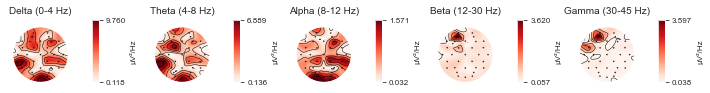

time 6.850315789473684
Effective window size : 0.256 (s)


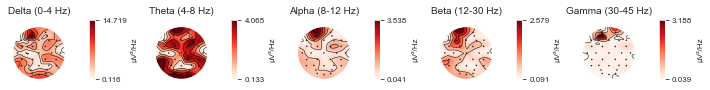

time 7.3772631578947365
Effective window size : 0.256 (s)


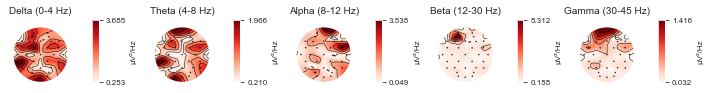

time 7.904210526315789
Effective window size : 0.256 (s)


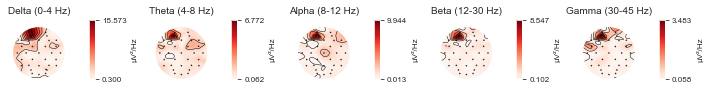

time 8.431157894736842
Effective window size : 0.256 (s)


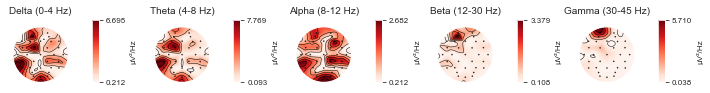

time 8.958105263157893
Effective window size : 0.256 (s)


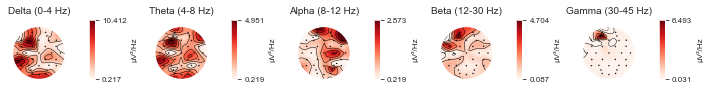

time 9.485052631578947
Effective window size : 0.256 (s)


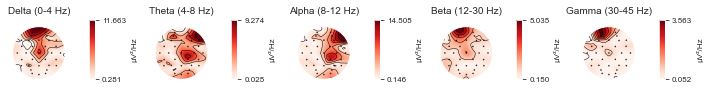

time 10.012


In [101]:
n = 20
parts = np.linspace(0,df.shape[1]/1000, n)

for i in range(1,n):
    spectrum = raw.compute_psd(picks=ch_names, tmin=parts[i-1], tmax=parts[i])
    spectrum.pick('eeg').plot_topomap()
    print(f'time {parts[i]}')
    plt.show()

For the Gamma-band there is no strong activity, only the frontal lobe part of the brain shows something, it means that brain was concentrated on voluntary movement, expressive language or for managing higher level executive functions.
For the Beta-band there was something looks like noise for the first ~2.6 secs, then there was kinda silence (except activity on the top-left part) with some "impulses" on 5th and 7th secs. "beta waves are associated with the muscle contractions " and "Beta activity is increased when movement has to be resisted or voluntarily suppressed" – says wikipedia.
For the Alpha-band there was some activity during whole experiment.
For the Theta-band there were strong activities on the top of the picture at 1.5 and 3 secs.
For the Delta-band there was an activity mostly on the left part of the brain, with strong impulses on 1.5, 3.6, 8,4 secs at the top of the pictures.


So, my assumption is that the key activity happens on the top of the left-top of the pictures – frontal lobe or frontal cortex, and there is one-two electrode responsible for this part of the brain. They are Fp1 and AF3, they match 1st and 2nd channels.

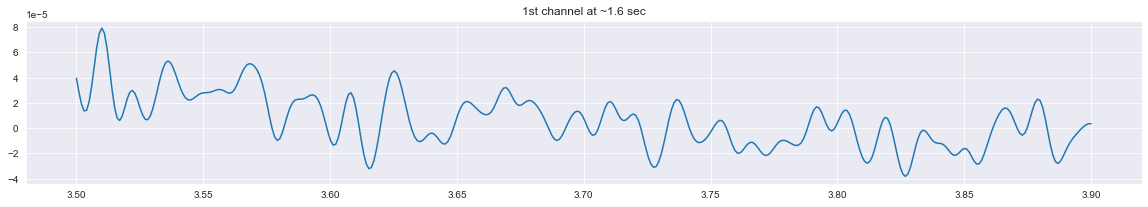

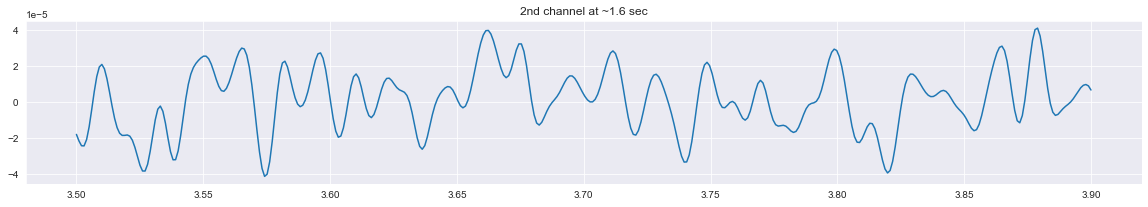

In [102]:
# slices of the key activities of the first 2 channels
# they are at 1.6 sec, 3.7 sec, 8.4 sec
# lets choose 3.7 as the most powerful one

t1 = np.linspace(3.5, 3.9, 400)
slce_1_1 = ([t1], [df.T[0][3500:3900]])
plt.plot(t1, df.T[0][3500:3900])
plt.title('1st channel at ~1.6 sec')
plt.show()
slce_1_2 = ([t1], [df.T[1][3500:3900]])
plt.plot(t1, df.T[1][3500:3900])
plt.title('2nd channel at ~1.6 sec')
plt.show()


Now let's do the same for the second file

In [110]:
df2 = pd.read_csv('second.csv', header=None)
montage = mne.channels.make_standard_montage('biosemi32')
ch_names = montage.ch_names
info = mne.create_info(ch_names = ch_names, sfreq = freq, ch_types='eeg')
raw = mne.io.RawArray(df2, info)
raw.del_proj()
raw.set_montage(montage)

Creating RawArray with float64 data, n_channels=32, n_times=9974
    Range : 0 ... 9973 =      0.000 ...     9.973 secs
Ready.


<RawArray | 32 x 9974 (10.0 s), ~2.5 MB, data loaded>

Effective window size : 0.256 (s)


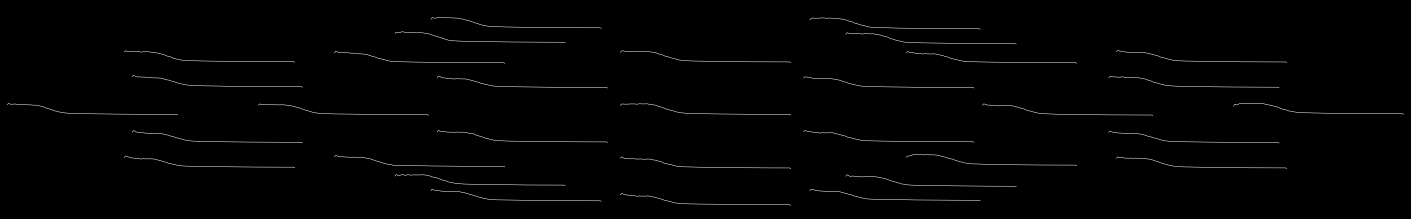

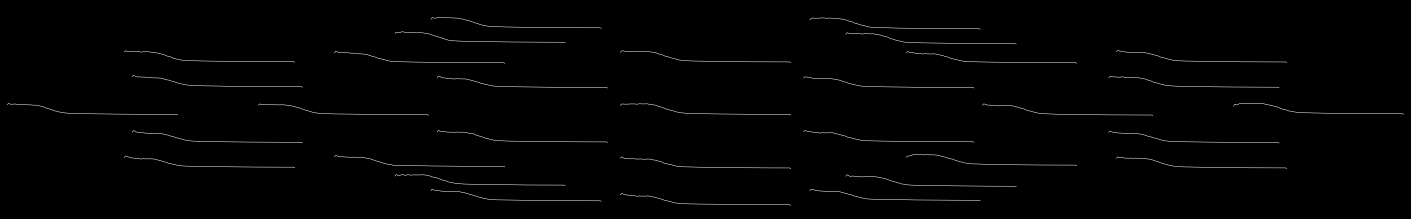

In [111]:
spectrum = raw.compute_psd(picks=ch_names)
spectrum.pick('eeg').plot_topo()

Effective window size : 0.256 (s)


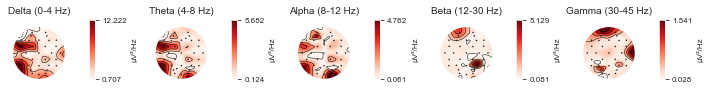

time 0.5249473684210526
Effective window size : 0.256 (s)


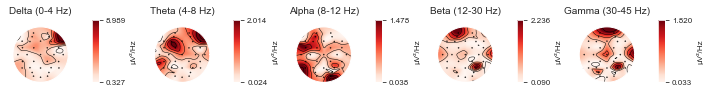

time 1.0498947368421052
Effective window size : 0.256 (s)


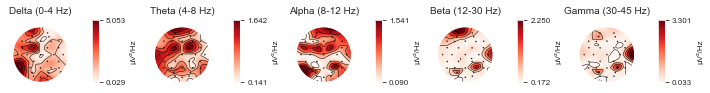

time 1.5748421052631578
Effective window size : 0.256 (s)


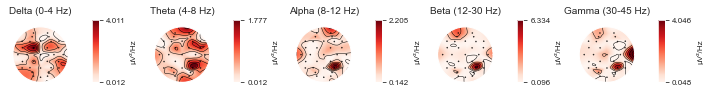

time 2.0997894736842104
Effective window size : 0.256 (s)


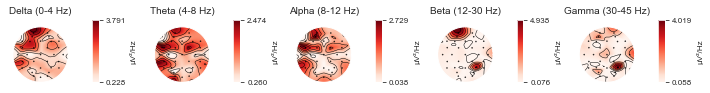

time 2.6247368421052633
Effective window size : 0.256 (s)


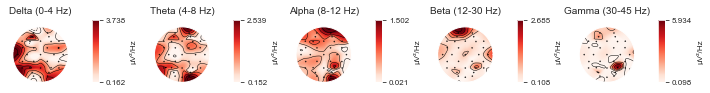

time 3.1496842105263156
Effective window size : 0.256 (s)


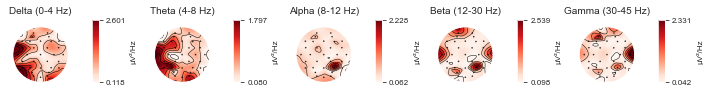

time 3.674631578947368
Effective window size : 0.256 (s)


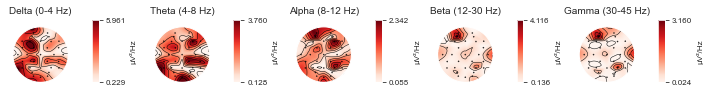

time 4.199578947368421
Effective window size : 0.256 (s)


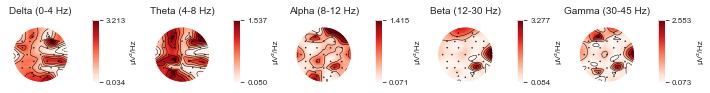

time 4.724526315789474
Effective window size : 0.256 (s)


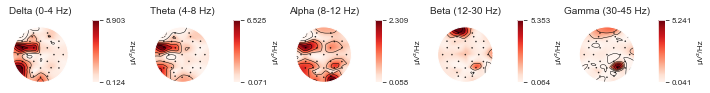

time 5.2494736842105265
Effective window size : 0.256 (s)


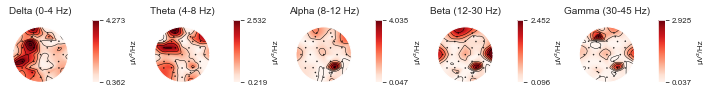

time 5.7744210526315785
Effective window size : 0.256 (s)


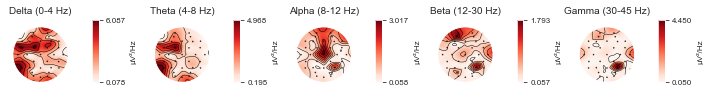

time 6.299368421052631
Effective window size : 0.256 (s)


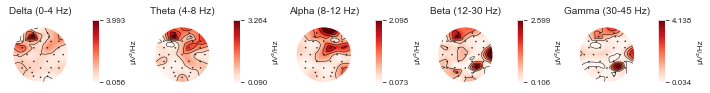

time 6.824315789473684
Effective window size : 0.256 (s)


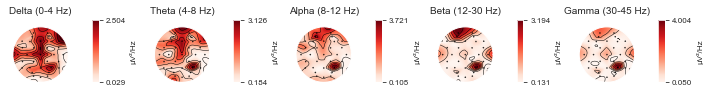

time 7.349263157894736
Effective window size : 0.256 (s)


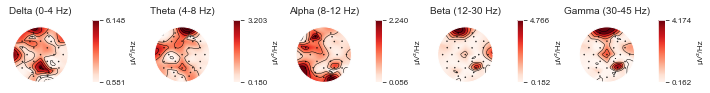

time 7.874210526315789
Effective window size : 0.256 (s)


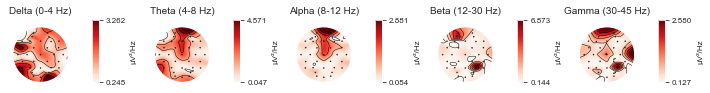

time 8.399157894736842
Effective window size : 0.256 (s)


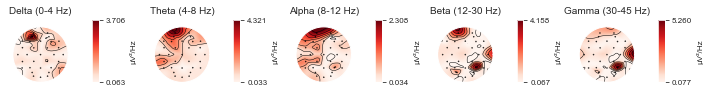

time 8.924105263157895
Effective window size : 0.256 (s)


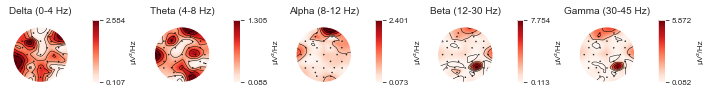

time 9.449052631578947
Effective window size : 0.256 (s)


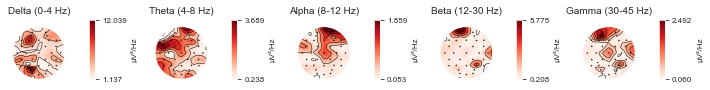

time 9.974


In [112]:
n = 20
parts = np.linspace(0,df2.shape[1]/1000, n)

for i in range(1,n):
    spectrum = raw.compute_psd(picks=ch_names, tmin=parts[i-1], tmax=parts[i])
    spectrum.pick('eeg').plot_topomap()
    print(f'time {parts[i]}')
    plt.show()

For these experiment there was activity on the left part of pictures – cerebral cortex, the most powerful impulse was at the beginning of the experiment. Responsible for cognition.
Activity detected on sensor FC5 – channel 6

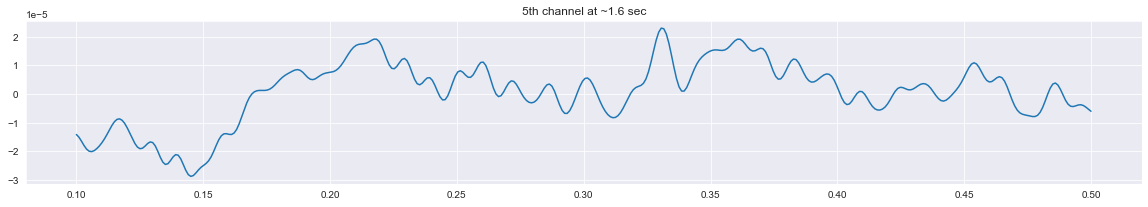

In [118]:
t2 = np.linspace(0.1, 0.5, 400)
slce_2_1 = ([t2], [df2.T[5][100:500]])
plt.plot(t2, df2.T[5][100:500])
plt.title('5th channel at ~1.6 sec')
plt.show()

Correlation Test

In [119]:
from scipy.stats import pearsonr

stat, p = pearsonr(slce_1_1[1][0], slce_2_1[1][0])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably independent')
else:
    print('Probably dependent')

stat=-0.514, p=0.000
Probably dependent


But let me choose the same channel for the first test and choose right slice of activity.

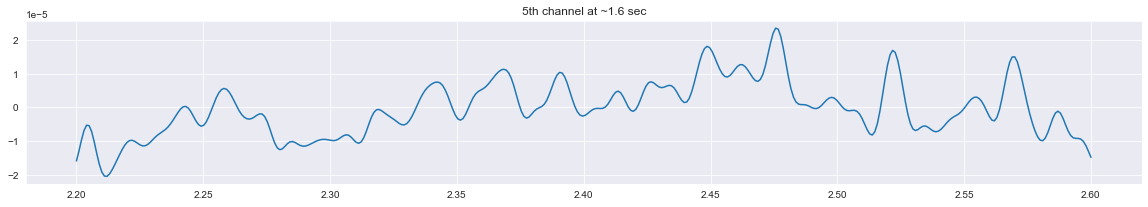

In [125]:
t3 = np.linspace(2.2, 2.6, 400)
slce_1_3 = ([t3], [df.T[5][2200:2600]])
plt.plot(t3, df.T[5][2200:2600])
plt.title('5th channel at ~1.6 sec')
plt.show()

In [126]:
stat, p = pearsonr(slce_2_1[1][0], slce_1_3[1][0])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably independent')
else:
    print('Probably dependent')

stat=0.349, p=0.000
Probably dependent


In [127]:
# lets see the correlation coeff:
r = np.corrcoef(slce_2_1[1][0], slce_1_3[1][0])
r

array([[1.        , 0.34863648],
       [0.34863648, 1.        ]])

Weak correlation, but it is a result anyway!